# 1. Problem Statement

## About Company:
BC Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. 
The customer first applies for a home loan after that company validates the customer's eligibility for a loan.

## Problem:
The company wants to automate the loan eligibility process (real-time) based on customer detail provided while 
filling out the online application form. 

These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History 
and others. To automate this process, they have given a problem identifying the customer segments eligible for 
loan amounts to target these customers specifically. Here they have provided a partial dataset. 
(see data-for-project-1 folder).

# 2. Hypothesis Generation
In the context of BC Finance's objective to automate the loan eligibility process, several hypotheses have been formulated based on the provided dataset and problem statement. Firstly, it is hypothesized that higher income individuals are more likely to be eligible for larger loan amounts, suggesting a positive correlation between income and loan amount eligibility. Additionally, the hypothesis posits that customers with a positive credit history are more likely to be eligible for higher loan amounts compared to those with a negative credit history. Furthermore, the stability of marital status is proposed to influence loan eligibility, with married individuals potentially being more eligible for higher loan amounts due to their presumed stable financial situations. Education level is also suggested to impact loan eligibility, as individuals with higher education levels may correlate with higher income and thus be more eligible for larger loan amounts. Moreover, the number of dependents is hypothesized to affect loan eligibility, with customers having fewer dependents deemed more likely to be eligible for larger loan amounts compared to those with more dependents, who may have higher financial obligations. Gender is considered to be a less significant factor in determining loan eligibility, although differences in loan amounts may exist based on income and credit history between genders. Additionally, it is proposed that there is a positive correlation between the requested loan amount and loan eligibility, suggesting that customers with higher loan amount requests may have specific financial needs influencing their eligibility. Lastly, the stability of employment history is hypothesized to impact loan eligibility, with customers having a stable employment history deemed more likely to be eligible for larger loan amounts compared to those with a less stable employment history. These hypotheses provide a structured framework for analyzing the dataset and identifying key factors influencing loan eligibility, aiding BC Finance in automating their loan eligibility process effectively.

# 3. Getting the system ready and loading the data

In [154]:
# Supress warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


import pandas as pd

#For analising data
import skimpy 
from skimpy import skim

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data cleaning
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# For deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

#Gathering initial data and exploring its characteristics.
df = pd.read_csv('../data/raw_data.csv')

---

# 4. Data Understanding
- Gathering initial data and exploring its characteristics.
- Assessing data quality, completeness, and relevance.
- Identifying potential data issues and limitations.


---

In [155]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


---

The dataset contains a mix of numerical and categorical variables representing various attributes of loan applicants and their loan applications. The dataset appears to be suitable for analyzing factors influencing loan approval decisions and building predictive models for loan eligibility. However, further exploration and analysis are needed to understand the relationships and patterns within the data fully.


---

In [156]:
# Assessing data quality, completeness, and relevance
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


---

- The dataset contains 614 entries (rows) and 13 columns.
- Each column represents a different variable or feature.
- The variables have different data types:
- Four columns are of type float64, representing numerical variables (e.g., CoapplicantIncome, LoanAmount).
- One column is of type int64, representing a numerical variable (e.g., ApplicantIncome).
- Eight columns are of type object, representing categorical variables (e.g., Gender, Married, Education).
- There are missing values in several columns:
Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History have some missing values.
- The target variable (Loan_Status) is categorical and has two classes: Y (Yes) and N (No).
- Other categorical variables include Gender, Married, Education, Self_Employed, and Property_Area.
- Numerical variables include ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History.

---

In [157]:
summary = skim(df)
summary

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 614    │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 13     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %   ┃ mean   ┃ sd     ┃ p0   ┃ p25    ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ ApplicantIncome        │   0 │      0 │   5400 │   6100 │  150 │   2900 │  3800 │  5800 │  81000 │    ▇    │  │
│ │ CoapplicantIncome      │   0 │      0 │   1600 │   2900 │    0 │      0 │  1200 │  2300 │  42000 │    ▇    │  │
│ │ LoanAmount             │  22 │   3.58 │    150 │     86 │    9 │    100 │   130 │   170 │    700 │   ▇▇▁   │  │
│ │ Loan_Amount_Term       │  14 │   2.28 │    340 │     65 │   12 │    360 │   360 │   360 │    480 │    ▁ ▇  │  │
│ │ Credit_History         │  50 │   8.14 │   0.84 │   0.36 │    0 │      1 │     1 │     1 │      1 │ ▁    ▇  │  │
│ └────────────────────────┴─────┴────────┴────────┴────────┴──────┴────────┴───────┴───────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Loan_ID                      │      0 │          0 │                           1 │                     614 │  │
│ │ Gender                       │     13 │       2.12 │                        0.98 │                     601 │  │
│ │ Married                      │      3 │       0.49 │                           1 │                     611 │  │
│ │ Dependents                   │     15 │       2.44 │                        0.98 │                     599 │  │
│ │ Education                    │      0 │          0 │                         1.2 │                     748 │  │
│ │ Self_Employed                │     32 │       5.21 │                        0.95 │                     582 │  │
│ │ Property_Area                │      0 │          0 │                           1 │                     614 │  │
│ │ Loan_Status                  │      0 │          0 │                           1 │                     614 │  │
│ └──────────────────────────────┴────────┴────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

---

This summary provides a quick overview of the dataset's structure, missing values, and basic statistics for numerical variables. It can be useful for identifying potential issues and guiding further data exploration and analysis. 

In [158]:
df = pd.read_csv('../data/raw_data.csv')
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Univariate Analysis

In [159]:
(
    df['Property_Area']
          .astype('str')
          .str.replace('N', 'No')
          .str.replace('Y', 'Yes')
          .value_counts()
          .reset_index()
)

,Property_Area,count
0,Semiurban,233
1,Urban,202
2,Rural,179


In [160]:
import pandas as pd
import plotly.express as px

# Assuming df is your DataFrame containing the 'Property_Area' column
labels = (df['Property_Area']
          .astype('str')
          .str.replace('N', 'No')
          .str.replace('Y', 'Yes')
          .value_counts()
          .reset_index())

# Rename columns for clarity
labels.columns = ['Property_Area', 'Count']

# Create figure using Plotly
fig = px.bar(
    data_frame=labels, 
    x='Property_Area', 
    y='Count', 
    title='Class Imbalance', 
    color='Property_Area'
)

# Add titles & Display figure
fig.update_layout(xaxis_title='Loan Status', yaxis_title='Number of Customers')
fig.show()


## Bivariate Analysis

### Numeric Features

Find all numerical features

In [161]:
df.select_dtypes('number').nunique()

ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
dtype: int64

In [162]:
# Select features to plot
plot_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']

# Plot numeric features against target
plt.Figure(figsize=(3,4))
for col in plot_cols:
    fig = px.box(data_frame=df[plot_cols], x=col, color=df['Loan_Status'], title=f'BoxPlot for {col} Feature against the Target')
    fig.update_layout(xaxis_title=f'{col} Feature')
    fig.show()

## Categorical Features

Find all categorical features

In [163]:
df.select_dtypes('object').nunique()


Loan_ID          614
Gender             2
Married            2
Dependents         4
Education          2
Self_Employed      2
Property_Area      3
Loan_Status        2
dtype: int64

In [164]:
plot_cols = ['Gender'
             ,'Married'
             ,'Dependents'
             ,'Education'
             ,'Self_Employed'
             ,'Property_Area']

plt.Figure(figsize=(3,4))
for col in plot_cols:
    string_df = pd.DataFrame(
    df[[col, 'Loan_Status']]
    .groupby(['Loan_Status'])
    .value_counts()
    .reset_index()
    )
    
    fig = px.bar(
    data_frame=string_df, 
    x=col, 
    y='count', 
    facet_col='Loan_Status', 
    color=string_df['Loan_Status'].astype(str) # convert it to string to avoid continuous scale on legend
    )

    fig.update_layout(xaxis_title=col, yaxis_title='Number of Customers')
    fig.show()

# Data Cleaning

Find all the binary categorical features and turn thm into numerical features

In [165]:

# Select columns with 'object' dtype
categorical_features = df.select_dtypes(include=['object'])

# Calculate the number of unique values in each categorical feature
unique_value_counts = categorical_features.nunique()

# Filter categorical features with more than two unique values
categorical_features_only_two_unique = unique_value_counts[unique_value_counts == 2].index.tolist()
categorical_features_only_two_unique

['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']

In [166]:
# Create an empty dictionary to store answers for each column
answers_dict = {}

# Iterate through each column with only two unique values
for column in categorical_features_only_two_unique:
    # Get the unique values for the column
    unique_values = df[column].unique().tolist()
    # Add the unique values to the dictionary
    answers_dict[column] = unique_values

# Print the dictionary containing answers for each column
answers_dict

{'Gender': ['Male', 'Female', nan],
 'Married': ['No', 'Yes', nan],
 'Education': ['Graduate', 'Not Graduate'],
 'Self_Employed': ['No', 'Yes', nan],
 'Loan_Status': ['Y', 'N']}

In [167]:
# Define mapping for replacing answers with 1 or 0
mapping = {
    'Male': 1, 'Female': 0,
    'Yes': 1, 'No': 0,
    'Graduate': 1, 'Not Graduate': 0,
    'Y': 1, 'N': 0
}

# Iterate through each categorical feature
for feature in ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']:
    # Replace answers with 1 or 0
    df[feature] = df[feature].map(mapping)
    # Replace NaN values with the mode
    df[feature].fillna(df[feature].mode()[0], inplace=True)

df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,1.0,1.0,3+,1,0.0,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,1.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,1.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,Urban,1


Identify all non-binary categorical features in the dataset and convert them into binary fields using one-hot encoding.

In [168]:
# Select columns with 'object' dtype
categorical_features = df.select_dtypes(include=['object'])

# Calculate the number of unique values in each categorical feature
unique_value_counts = categorical_features.nunique()

# Filter categorical features with more than two unique values
categorical_features_more_than_two_unique = unique_value_counts[unique_value_counts > 2].index.tolist()
categorical_features_more_than_two_unique

['Loan_ID', 'Dependents', 'Property_Area']

In [169]:
# Perform one-hot encoding for each categorical feature
for feature in categorical_features_more_than_two_unique:
    if feature!= 'Loan_ID':
        one_hot_encoded = pd.get_dummies(df[feature], prefix=feature, dtype=int)
        df = pd.concat([df, one_hot_encoded], axis=1)

# Drop the original categorical columns
df.drop(categorical_features, axis=1, inplace=True)

numerical_features=df.select_dtypes(include=['number']).columns.tolist()

numerical_features

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Loan_Status',
 'Dependents_0',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

In [170]:
# check missing values in 
missing_values_count = df.isnull().sum()
missing_values_count[missing_values_count > 0]

LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

Identify features with missing values and fill them with the mean to minimize their impact on the model.

In [171]:
# Identify features with missing values
features_with_missing = df.columns[df.isnull().any()]

# Fill missing values with the mean
for feature in features_with_missing:
    mean_value = df[feature].mean()
    df[feature].fillna(mean_value, inplace=True)

missing_values_count = df.isnull().sum()
missing_values_count[missing_values_count > 0]

Series([], dtype: int64)

# 8. Model building: part 1 (Apply Deep Learning classification algorithm without step 9)

In [172]:
# Assuming your target variable is 'Loan_Status' and features are all other columns
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [173]:
# Build the deep learning model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, \nTest Accuracy: {accuracy}")

Epoch 1/20


c:\Users\dekoc\anaconda3\envs\MLG382\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5490 - loss: 361.7176 - val_accuracy: 0.6753 - val_loss: 73.4764
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5979 - loss: 334.9508 - val_accuracy: 0.6558 - val_loss: 89.7387
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5678 - loss: 331.6072 - val_accuracy: 0.6494 - val_loss: 92.6050
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6045 - loss: 307.5788 - val_accuracy: 0.6104 - val_loss: 54.9704
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5251 - loss: 237.5429 - val_accuracy: 0.6234 - val_loss: 45.0577
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5606 - loss: 184.2995 - val_accuracy: 0.6494 - val_loss: 56.2196
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6204 - loss: 128.2531 - val_accuracy: 0.6494 - val_loss: 50.4810
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6249 - loss: 126.1686 - val_accuracy: 0.629

We see a baseline test accuracy of 66.88%

# 9. Feature engineering

Remove most outliers to get better accuracy

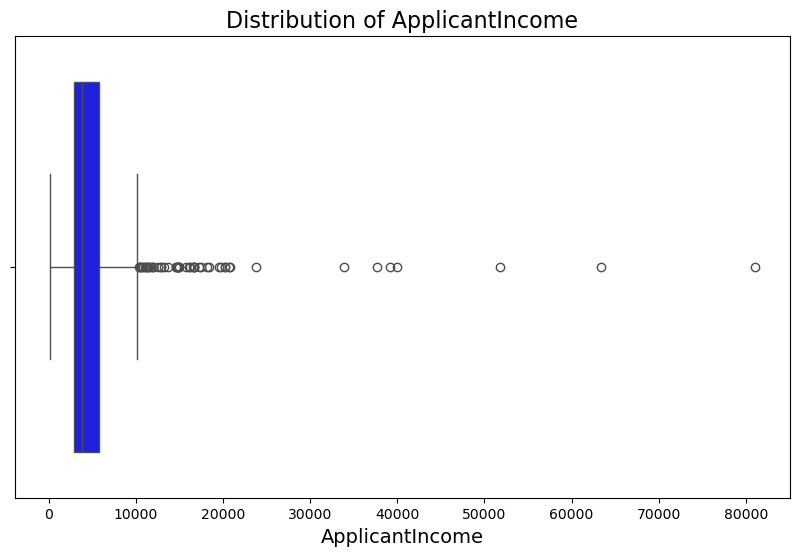

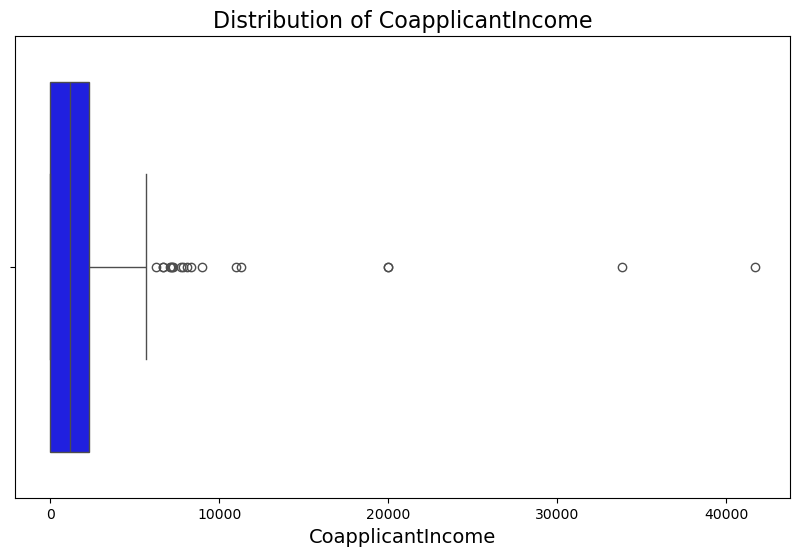

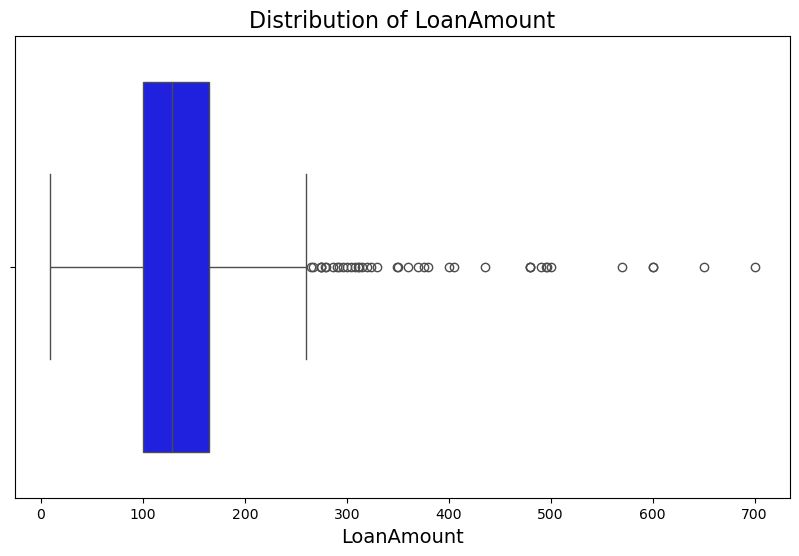

In [174]:
# Create a distribution plot using Seaborn
out_columns = ["ApplicantIncome","CoapplicantIncome","LoanAmount"]

for column in out_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column], color="blue")
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.show()

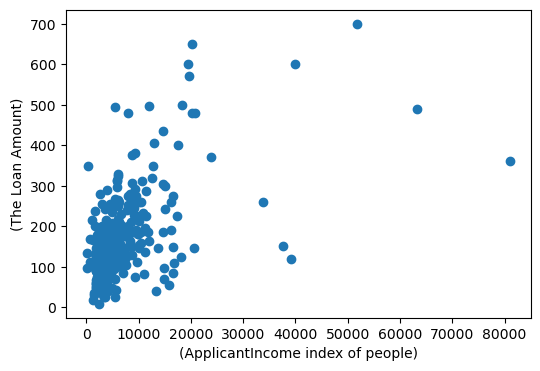

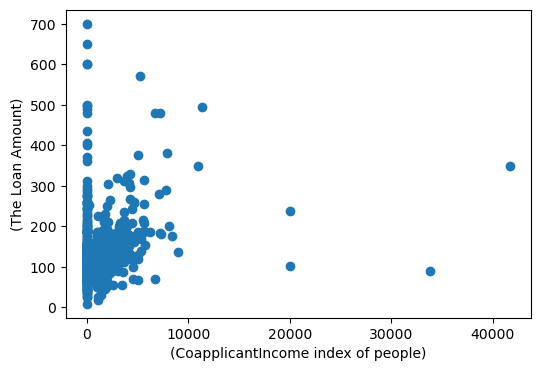

In [175]:
#scatter plots
out_columns2 = ["ApplicantIncome","CoapplicantIncome"]
for x in range(0,2):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.scatter(df[out_columns[x]], df['LoanAmount'])
    ax.set_xlabel(f'({out_columns[x]} index of people)')
    ax.set_ylabel('(The Loan Amount)')
    plt.show()

Remove outliers from the dataset to improve model accuracy and robustness.

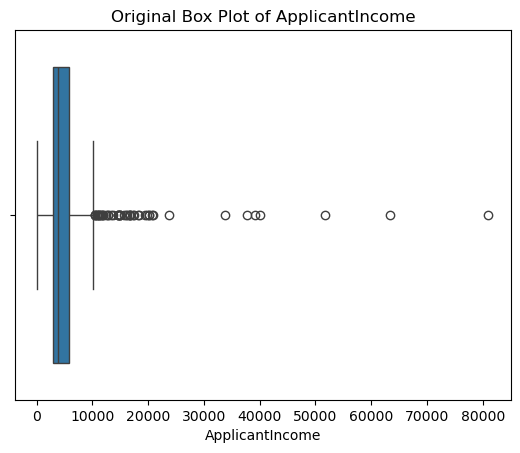

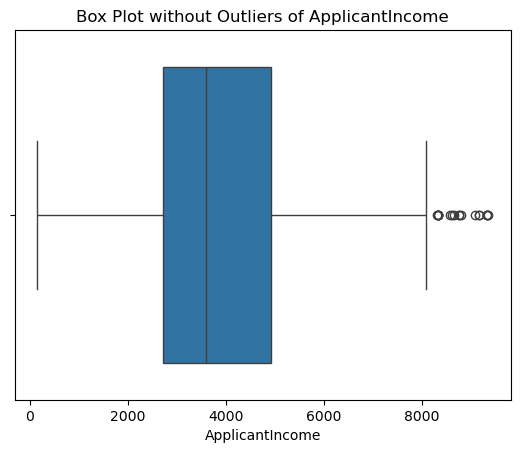

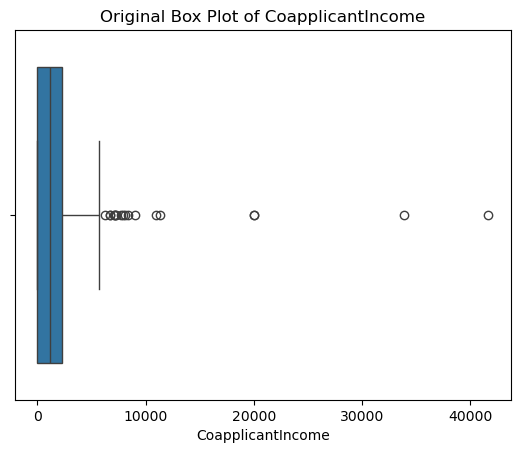

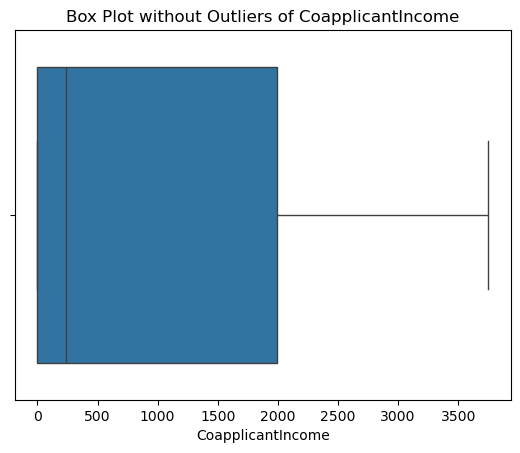

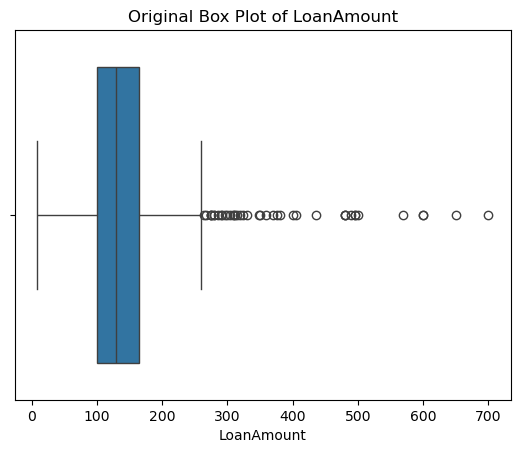

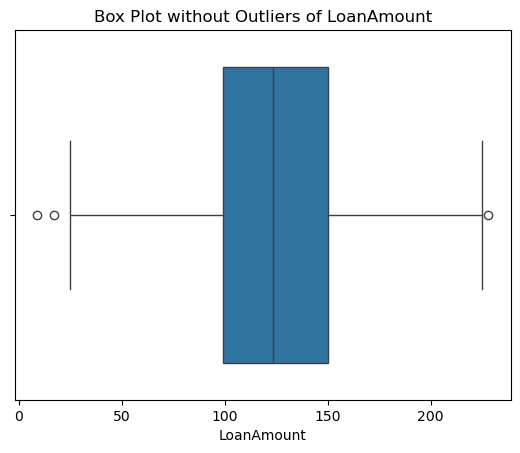

In [176]:
#removal of outliers
def removal_box_plot(df, column, threshold):
    sns.boxplot(x=df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column]<df[column].quantile(threshold)]

    sns.boxplot(x=removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers

threshold_value =  0.9

for x in range(0,3):
    no_outliers = removal_box_plot(df, out_columns[x], threshold_value)

Normalize the data to get more accuracy

In [180]:
#normalization
mn_mx_Scaler =MinMaxScaler()
normalized_df = mn_mx_Scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_df, columns =df.columns)
print("Normalized data")
df=normalized_df
df

Normalized data


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,1.0,0.0,0.070489,0.000000,0.198860,0.743590,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,0.0,0.054830,0.036192,0.172214,0.743590,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,1.0,1.0,0.035250,0.000000,0.082489,0.743590,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.030093,0.056592,0.160637,0.743590,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.072356,0.000000,0.191027,0.743590,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,1.0,0.0,0.034014,0.000000,0.089725,0.743590,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
610,1.0,1.0,1.0,0.0,0.048930,0.000000,0.044863,0.358974,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
611,1.0,1.0,1.0,0.0,0.097984,0.005760,0.353111,0.743590,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
612,1.0,1.0,1.0,0.0,0.091936,0.000000,0.257598,0.743590,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# 10. Model building: part 2 (Apply Deep Learning classification algorithm with step 9)

In [178]:
# Assuming your target variable is 'Loan_Status' and features are all other columns
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [179]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the deep learning model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, \nTest Accuracy: {accuracy}")

Epoch 1/20


c:\Users\dekoc\anaconda3\envs\MLG382\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5209 - loss: 0.7616 - val_accuracy: 0.6494 - val_loss: 0.6688
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6328 - loss: 0.7053 - val_accuracy: 0.6688 - val_loss: 0.6492
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6589 - loss: 0.6969 - val_accuracy: 0.6753 - val_loss: 0.6329
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7063 - loss: 0.6123 - val_accuracy: 0.6883 - val_loss: 0.6229
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6861 - loss: 0.6341 - val_accuracy: 0.6883 - val_loss: 0.6139
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6904 - loss: 0.6675 - val_accuracy: 0.7143 - val_loss: 0.6025
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7299 - loss: 0.5865 - val_accuracy: 0.7208 - val_loss: 0.5929
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7274 - loss: 0.5762 - val_accuracy: 0.7403 - val_loss: 0.5847
Ep

After feature engeneering we see a test score accuracy of 77.92%
Our accuracy went up by 11.08%

11. Model deployment - Dash app on https://www.render.com